In [25]:
import numpy as np
from numpy import random
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline

# Get the data

In [92]:
# import data
df = pd.read_csv('../Data_case1/ptbdb_normal.csv')

In [4]:
normal_data = np.loadtxt('Data/ptbdb_normal.csv', delimiter=',')
abnormal_data = np.loadtxt('Data/ptbdb_abnormal.csv', delimiter=',')

### Binary dataset

In [47]:
#Data from the binary dataset
Nn = len(normal_data)
Nn_train = int(Nn/2)
Nn_test = int(0.3*Nn)
normal_train = normal_data[:Nn_train,:-1]
normal_dev = normal_data[Nn_train:Nn_train + Nn_test,:-1]
normal_test = normal_data[Nn_train + Nn_test:,:-1]
Na = len(abnormal_data)
Na_train = int(Na/2)
Na_test = int(0.3*Na)
abnormal_train = abnormal_data[:Na_train,:-1]
abnormal_dev = abnormal_data[Na_train:Na_train + Na_test,:-1]
abnormal_test = abnormal_data[Na_train + Na_test:,:-1]
X_train2 = np.vstack([normal_train, abnormal_train])
y_train2 = np.vstack([[0] * len(normal_train) + [1] * len(abnormal_train)])[0]
X_dev2 = np.vstack([normal_dev, abnormal_dev])
y_dev2 = np.vstack([[0] * len(normal_dev) + [1] * len(abnormal_dev)])[0]
X_traindev2 = np.vstack([X_train2, X_dev2])
y_traindev2 = np.vstack([[0] * len(normal_train) + [1] * len(abnormal_train) + [0] * len(normal_dev) + [1] * len(abnormal_dev)][0])
X_test2 = np.vstack([normal_test, abnormal_test])
y_test2 = np.vstack([[0] * len(normal_test) + [1] * len(abnormal_test)])[0]

1st column: normal heartbeats


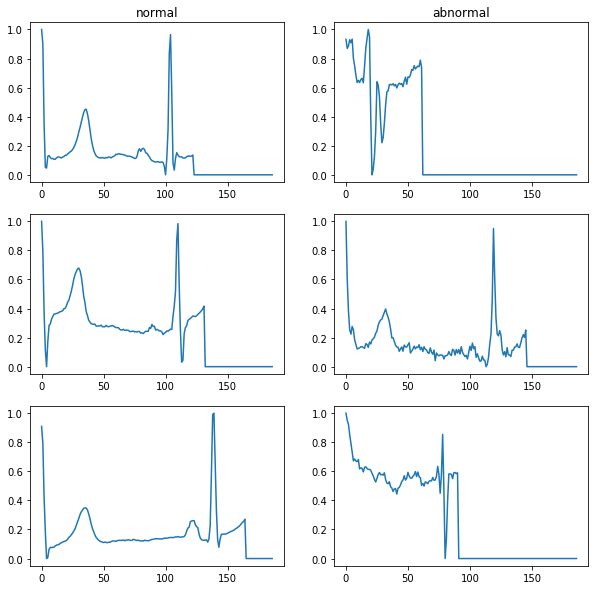

In [79]:
print('1st column: normal heartbeats')
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots(3,2)
ax[0,0].plot(normal_train[0,:])
ax[0,0].set_title('normal')
ax[0,1].plot(abnormal_train[0,:])
ax[0,1].set_title('abnormal')
ax[1,0].plot(normal_train[1,:])
ax[1,1].plot(abnormal_train[1,:])
ax[2,0].plot(normal_train[2,:])
ax[2,1].plot(abnormal_train[2,:])

### 5-class dataset

In [6]:
# 5 class data
train_data5 = np.loadtxt('Data_case1/mitbih_train.csv', delimiter = ',')
random.shuffle(train_data5)
test_data5 = np.loadtxt('Data_case1/mitbih_train.csv', delimiter = ',')

In [36]:
N = np.int(len(train_data5)/3)
X_dev5 = train_data5[:N,:-1]
y_dev5 = train_data5[:N,-1]
X_train5 = train_data5[N:,:-1]
y_train5 = train_data5[N:,-1]
X_traindev5 = train_data5[:,:-1]
y_traindev5 = train_data5[:,-1]
X_test5 = test_data5[:,:-1]
y_test5 = test_data5[:,-1]

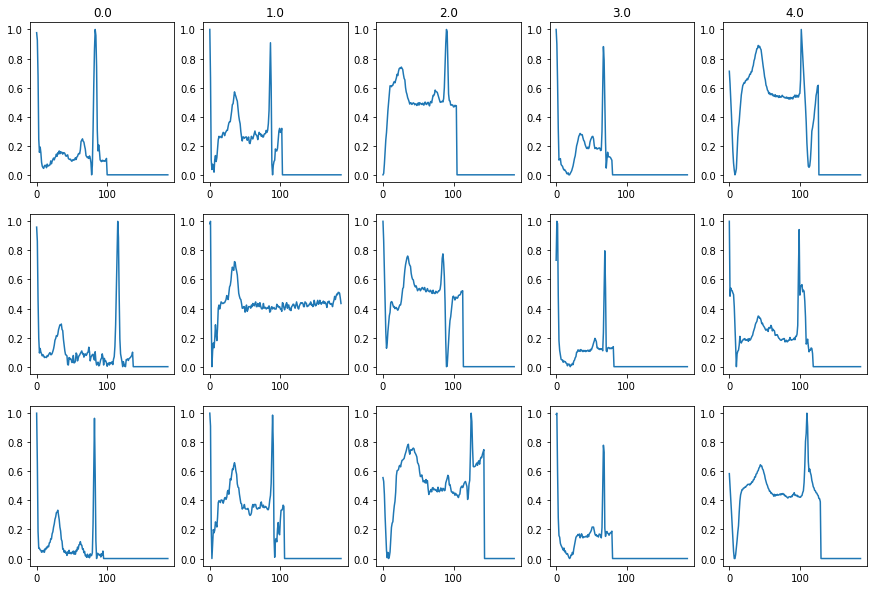

In [90]:
train_data5[72471+2224][-1]
plt.rcParams['figure.figsize'] = [15,10]
fig, ax = plt.subplots(3,5)
ax[0,0].plot(train_data5[0][:-1])
ax[0,0].set_title(train_data5[0][-1])
ax[0,1].plot(train_data5[72471][:-1])
ax[0,1].set_title(train_data5[72471][-1])
ax[0,2].plot(train_data5[72471+2223][:-1])
ax[0,2].set_title(train_data5[72471+2223][-1])
ax[0,3].plot(train_data5[72471+2223+5788][:-1])
ax[0,3].set_title(train_data5[72471+2223+5788][-1])
ax[0,4].plot(train_data5[72471+2223+5788+641][:-1])
ax[0,4].set_title(train_data5[72471+2223+5788+641][-1])
ax[1,0].plot(train_data5[1][:-1])
ax[1,1].plot(train_data5[72472][:-1])
ax[1,2].plot(train_data5[72471+2224][:-1])
ax[1,3].plot(train_data5[72471+2223+5789][:-1])
ax[1,4].plot(train_data5[72471+2223+5788+642][:-1])
ax[2,0].plot(train_data5[2][:-1])
ax[2,1].plot(train_data5[72473][:-1])
ax[2,2].plot(train_data5[72471+2225][:-1])
ax[2,3].plot(train_data5[72471+2223+5790][:-1])
ax[2,4].plot(train_data5[72471+2223+5788+643][:-1])


## K Nearest Neighbours

## Binary dataset

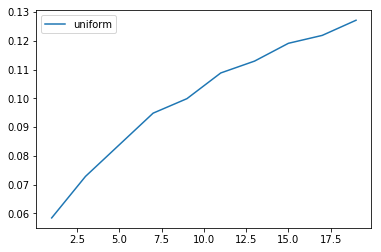

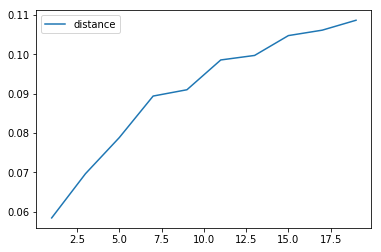

In [8]:
L = [[],[]]
for j, weights in enumerate(['uniform', 'distance']):
    for n_neighbors in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train2, y_train2)
        Z = clf.predict(X_dev2)
        misclassification = 0
        for i, z in enumerate(Z):
            if z != y_dev2[i]:
                misclassification += 1
        misclassification = misclassification / len(Z)
        L[j].append([n_neighbors, misclassification])
    plt.figure(j)
    plt.plot([x[0] for x in L[j]], [x[1] for x in L[j]])
    plt.legend([weights])

According to the validation process above, the best parameter to take is n_neighbour = 1. So We don't need weights.

### Test of the model on the binary dataset

In [93]:
knn = neighbors.KNeighborsClassifier(1, weights='uniform')
knn.fit(X_traindev2, y_traindev2)
Z = knn.predict(X_test2)
misclassification = 0
misclassified = [0,0]
total = [0,0]
for i, z in enumerate(Z):
    if z != y_test2[i]:
        misclassification += 1
        misclassified[y_test2[i]] += 1
    total[y_test2[i]] += 1
misclassification = misclassification / len(Z)
accuracy = 1 - misclassification
accuracies = [1 - misclassified[i]/total[i] for i in range(2)]
print('total accuracy: ', accuracy)
print('class accuracies: ', accuracies)

C:\Users\user\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


total accuracy:  0.9546703296703297
class accuracies:  [0.9395061728395062, 0.9605137963843958]


### Test of the model on the other dataset

In [11]:
knn.fit(X_train2, y_train2)
Z = knn.predict(X_train5)
misclassification = 0
for i, z in enumerate(Z):
    if z * y_train5[i] == 0 and z + y_train5[i] != 0:
        misclassification += 1
misclassification = misclassification / len(Z)
1 - misclassification

0.38216415012449456

## 5-class dataset

19  neighbors done
19  neighbors done


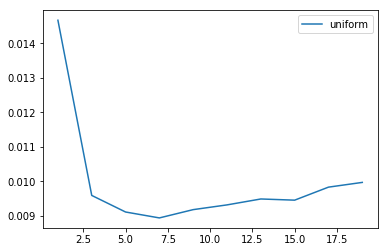

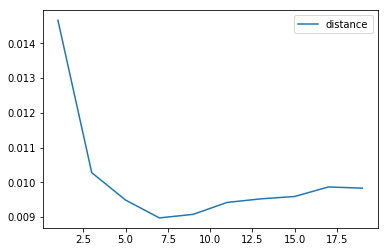

In [35]:
L = [[],[]]
for j, weights in enumerate(['uniform', 'distance']):
    for n_neighbors in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train5, y_train5)
        Z = clf.predict(X_dev5)
        misclassification = 0
        for i, z in enumerate(Z):
            if z != y_dev5[i]:
                misclassification += 1
        misclassification = misclassification / len(Z)
        L[j].append([n_neighbors, misclassification])
    print(n_neighbors, ' neighbors done')
    plt.figure(j)
    plt.plot([x[0] for x in L[j]], [x[1] for x in L[j]])
    plt.legend([weights])

The validation shows that we should use K = 7. however, the weights don't seem to be necessary.

### Test of the model on the same dataset

In [96]:
knn = neighbors.KNeighborsClassifier(7, weights='uniform')
knn.fit(X_traindev5, y_traindev5)
Z = knn.predict(X_test5)
misclassification = 0
misclassified = [0,0,0,0,0]
total = [0,0,0,0,0]
for i, z in enumerate(Z):
    if z != y_test5[i]:
        misclassification += 1
        misclassified[int(y_test5[i])] += 1
    total[int(y_test5[i])] += 1
misclassification = misclassification / len(Z)
accuracy = 1 - misclassification
accuracies = [1 - misclassified[i]/total[i] for i in range(5)]
print('total accuracy: ', accuracy)
print('class accuracies: ', accuracies)

total accuracy:  0.9780592548598579
class accuracies:  [0.9956948296560003, 0.6914080071974809, 0.9156876295784382, 0.7020280811232449, 0.9620587777950552]


97% classification Accuracy

In [49]:
Z = knn.predict(X_train2)
misclassification = 0
for i, z in enumerate(Z):
    if z * y_train2[i] == 0 and z + y_train2[i] != 0:
        misclassification += 1
misclassification = misclassification / len(Z)
1 - misclassification

0.3331500824628917